In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

A yield surface is a five-dimensional surface in the six-dimensional space of stresses. The yield surface is usually convex and the state of stress of inside the yield surface is elastic. When the stress state lies on the surface the material is said to have reached its yield point and the material is said to have become plastic

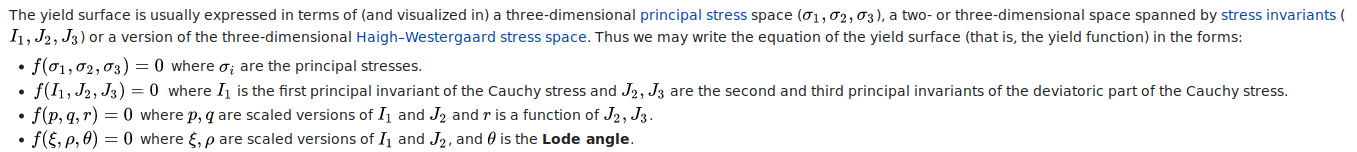


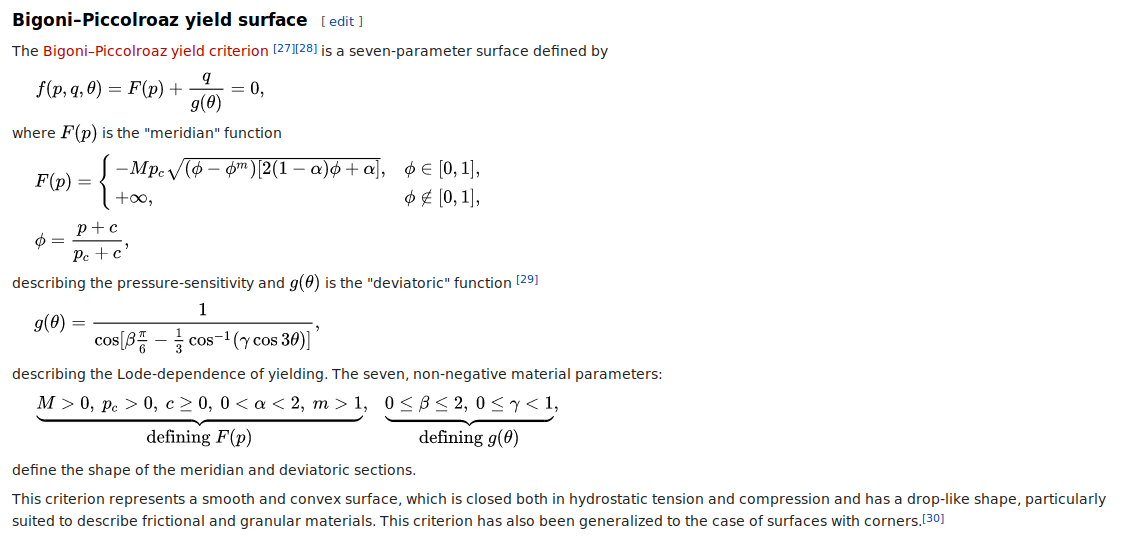

## general parameter set

In [2]:
fc=2.#1.#2.			# uniaxial compression yield strength [0:inf]
ft=1.			# uniaxial tension yield strength [0:inf]
r=fc/ft		# compression tension ratio

# meridian part


In [3]:

pc=1#1e10			#	hydrostatic compression strength [0:inf]
c=1#e10			# hydrostatic tension strength [0:inf]
M=0.5#1#0.5#1#0.5#0.5#1#2*ft/pc#1.			# pressure sensitivity [0:inf]
m=2.#1.			# distorsion of meridian function (rounding) [1:inf]
a=1.			#	distorsion of meridian function (skewness) [0:2]

# deviatoric part


In [4]:

b= 1.0#0#1.#0.5#origin = 0.94			# shape of deviatoric section () [0:2]
g=0.95#0.95# 0.2#0.2#origin 0.75			# shape of deviatoric section () [0:1]
#
fac=M*pc
#

# bigoni-piccolroaz criteria



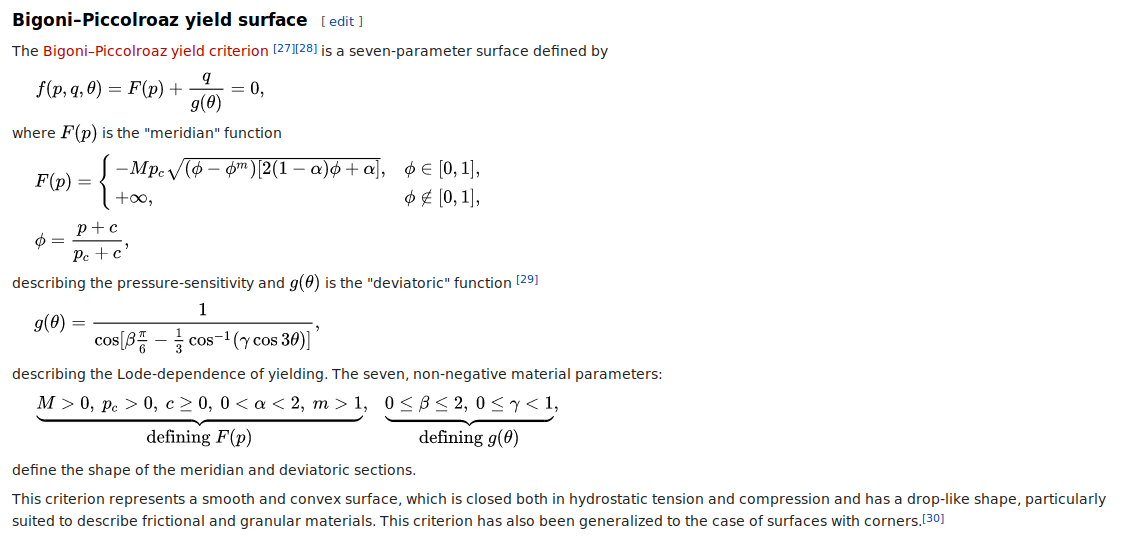

In [5]:

#
def phi(u): #Pressure sensitivity
	return (u+c)/(pc+c)
	
def F(u): #Meridian FUnction u = 'p' -----> Hydrostatic Part of stress i.e, -(1/3)*trace(sigma)
	return -M*pc*np.sqrt((phi(u)-phi(u)**m)*(2.*(1.-a)*phi(u)+a))
	
def d(v): #Deviatoric Function v = 'theta'------> Lode Angle dependence basically g(theta) in Bigoni Piccol. Formula
	return 1./np.cos(b*np.pi/6.-1./3.*np.arccos(g*np.cos(3.*v)))

def r(u,v): #This is the 'q' part ------> Since at the yield point the function = 0 and so q = -Meridian * Deviatoric
	return -F(u)*d(v)
#

# p,q,theta (scaled by fac)


In [6]:

def x(u,v):
	return -1./fac*(1./3.*u+2./3.*r(u,v)*np.cos(v))

def y(u,v):
	return -1./fac*(1./3.*u+2./3.*r(u,v)*np.cos(v-2./3.*np.pi))

def z(u,v):
	return -1./fac*(1./3.*u+2./3.*r(u,v)*np.cos(v+2./3.*np.pi))

def radius(x,y,z):
	return np.sqrt(x**2+y**2+z**2)
#

# yield surface

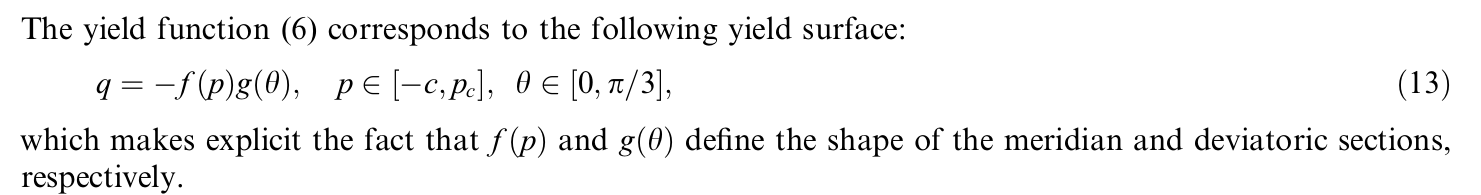

In [7]:
U = []
V = []
R = []
X,Y,Z = [],[],[]
Meridian = []
deviatoric = []
yield_surf = []

for u in np.linspace(-c,pc,25):
    for v in np.linspace(0,np.pi/3.,10):
        U.append(u)
        V.append(v)
        Meridian.append(F(u))
        deviatoric.append(d(v))
        yield_surf.append(r(u,v))
        X.append(x(u,v))
        Y.append(y(u,v))
        Z.append(z(u,v))
        R.append(radius(X[-1],Y[-1],Z[-1]))
        #		#print('%f %f %f' %(x(u,v),y(u,v),z(u,v)))
#		#print('%f %f %f' %(u,v,radius(x(u,v),y(u,v),z(u,v))))
        

In [8]:
#### Covertings lists to arrays for plotting
U = np.array(U)
V = np.array(V)
R = np.array(R)
X,Y,Z = np.array(X),np.array(Y),np.array(Z)
Meridian, deviatoric, yield_surf = np.array(Meridian),np.array(deviatoric),np.array(yield_surf)

## Plot

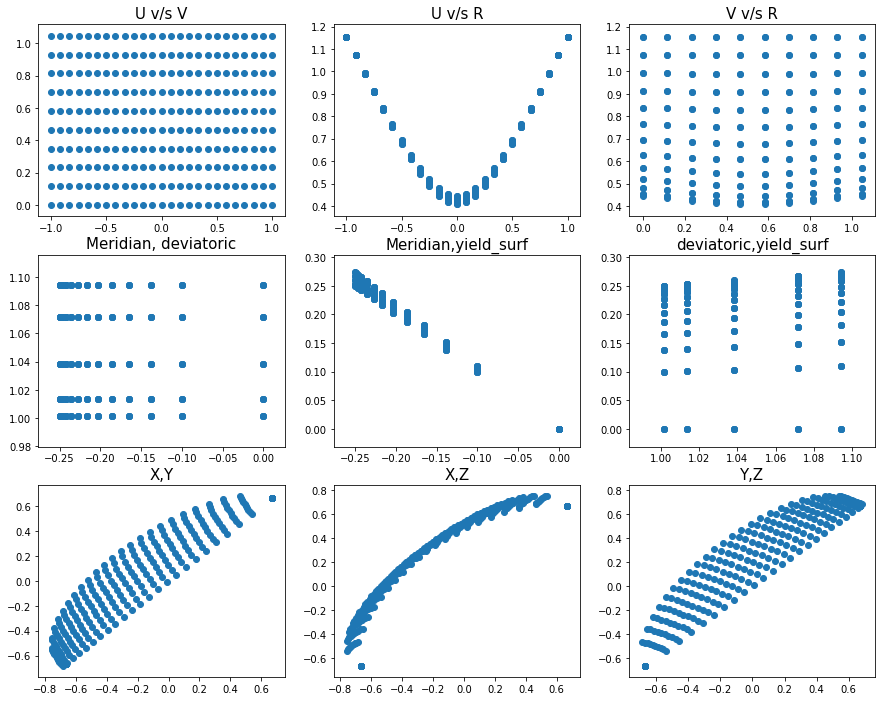

In [9]:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize= (15,12))

ax[0,0].scatter(U,V)
ax[0,0].set_title('U v/s V', fontsize=15)

ax[0,1].scatter(U,R)
ax[0,1].set_title('U v/s R', fontsize=15)

ax[0,2].scatter(V,R)
ax[0,2].set_title('V v/s R', fontsize=15)

ax[1,0].scatter(Meridian, deviatoric)
ax[1,0].set_title('Meridian, deviatoric', fontsize=15)

ax[1,1].scatter(Meridian,yield_surf)
ax[1,1].set_title('Meridian,yield_surf', fontsize=15)

ax[1,2].scatter(deviatoric,yield_surf)
ax[1,2].set_title('deviatoric,yield_surf', fontsize=15)

ax[2,0].scatter(X,Y)
ax[2,0].set_title('X,Y', fontsize=15)

ax[2,1].scatter(X,Z)
ax[2,1].set_title('X,Z', fontsize=15)

ax[2,2].scatter(Y,Z)
ax[2,2].set_title('Y,Z', fontsize=15)
plt.show()

# U, V, R

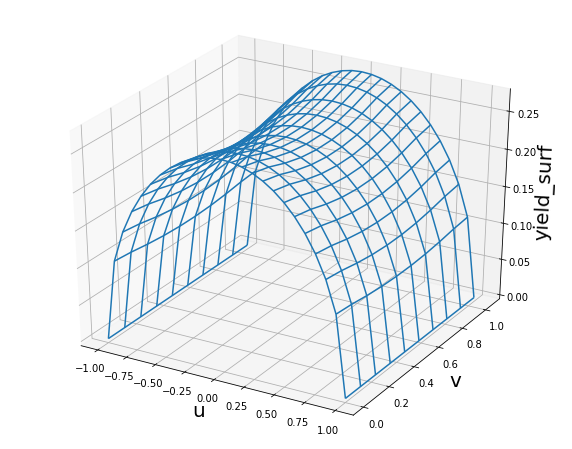

In [10]:
#3D plots
fig1 = plt.figure(figsize=(10,8))
ax1 = plt.axes(projection='3d')
#ax1.scatter3D(U,V,R)
ax1.plot_wireframe(U.reshape((25,10)),V.reshape((25,10)),yield_surf.reshape((25,10)))
ax1.set_xlabel('u', fontsize=20)
ax1.set_ylabel('v', fontsize=20)
ax1.set_zlabel('yield_surf', fontsize=20);
plt.show()

# X, Y, Z

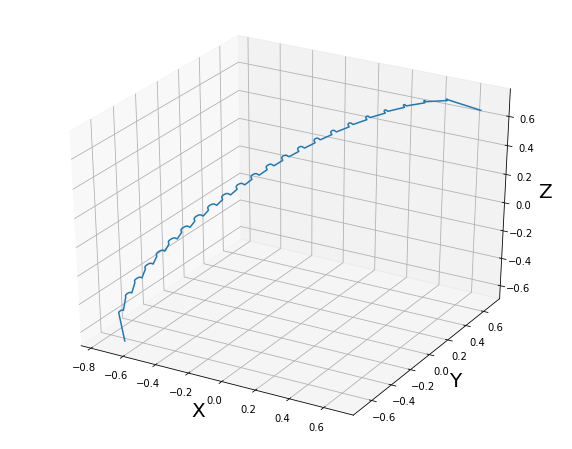

In [11]:
#3D plots
fig2 = plt.figure(figsize=(10,8))
ax2 = plt.axes(projection='3d')
ax2.plot3D(X,Y,Z)
ax2.set_xlabel('X', fontsize=20)
ax2.set_ylabel('Y', fontsize=20)
ax2.set_zlabel('Z', fontsize=20);
plt.show()

# Meridian, deviatoric, yield_surf

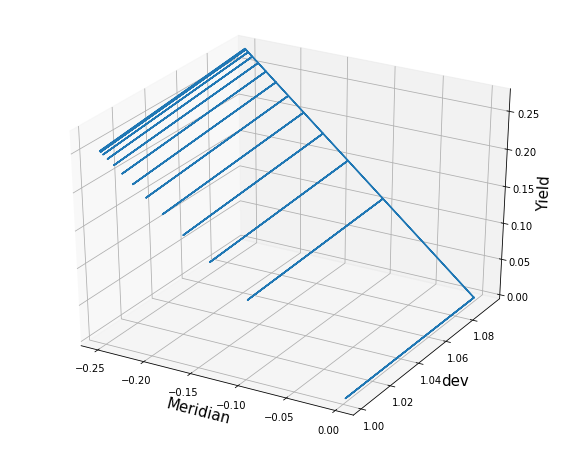

In [12]:
#3D plots
fig1 = plt.figure(figsize=(10,8))
ax3 = plt.axes(projection='3d')
ax3.plot3D(Meridian, deviatoric, yield_surf)
ax3.set_xlabel('Meridian', fontsize=15)
ax3.set_ylabel('dev', fontsize=15)
ax3.set_zlabel('Yield', fontsize=15);
plt.show()

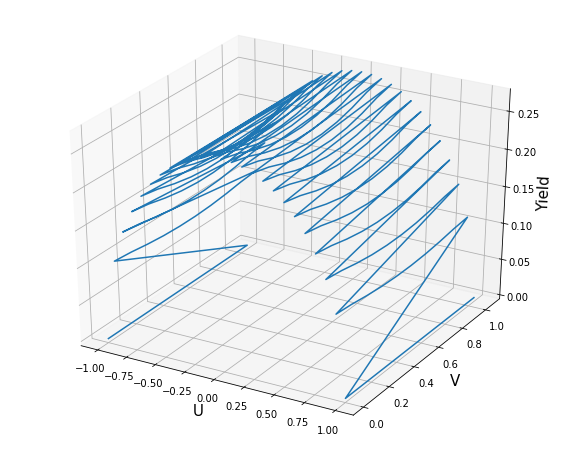

In [13]:
#3D plots
fig1 = plt.figure(figsize=(10,8))
ax4 = plt.axes(projection='3d')
ax4.plot3D(U, V, yield_surf)
ax4.set_xlabel('U', fontsize=15)
ax4.set_ylabel('V', fontsize=15)
ax4.set_zlabel('Yield', fontsize=15);
plt.show()

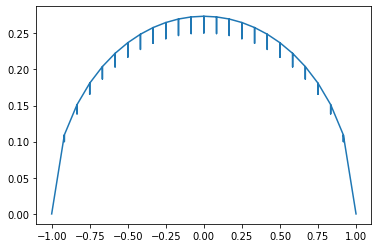

In [14]:
plt.plot(U,yield_surf)
plt.show()

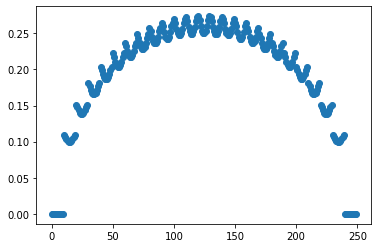

In [15]:
plt.plot(yield_surf,'o')

In [17]:
output_data = np.zeros((250,3))
output_data[:,0] = U
output_data[:,1] = V
output_data[:,2]= yield_surf
#output_data[:,3]=R

In [18]:
np.savetxt('output_bigoni_ellipse_check1.txt',output_data)

In [ ]:
data_st = np.loadtxt('output_bigoni_steel_check.txt')

In [ ]:
#plt.plot(data_st[:,2])
plt.plot(1e-5*yield_surf)

In [ ]:
plt.plot(data_st[:,2])

In [ ]:
np.amax(data_st[:,2])

In [ ]:
c=np.ones((1,5))
d1=5*np.ones((5))
c.shape, d1.shape

In [ ]:
e=d1-c
e.shape,e